In [2]:
#importing required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
train_dir = r'C:\Users\gyasw\OneDrive\Desktop\ML\ML Project\MY_data\train'
test_dir = r'C:\Users\gyasw\OneDrive\Desktop\ML\ML Project\MY_data\test'
predict_dir = r'C:\Users\gyasw\OneDrive\Desktop\ML\ML Project\MY_data\predict'

In [4]:
class_labels = ['apple', 'kiwi', 'orange']

In [5]:
#Data Preprocessing
# Image data generators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load the training and testing data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 160),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 160),
    batch_size=32,
    class_mode='categorical'
)

Found 680 images belonging to 3 classes.
Found 291 images belonging to 3 classes.


In [6]:
#CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 160, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 5 classes for the fruits
])

c:\Users\gyasw\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#Compiling the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
#Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 865ms/step - accuracy: 0.9123 - loss: 0.2746 - val_accuracy: 0.8681 - val_loss: 0.3966
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.8750 - loss: 0.3061 - val_accuracy: 0.8715 - val_loss: 0.4020
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 865ms/step - accuracy: 0.9063 - loss: 0.2605 - val_accuracy: 0.9062 - val_loss: 0.3171
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.8750 - loss: 0.5947 - val_accuracy: 0.8993 - val_loss: 0.3104
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 707ms/step - accuracy: 0.8822 - loss: 0.3266 - val_accuracy: 0.8993 - val_loss: 0.3157
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.9688 - loss: 0.0615 - val_accuracy: 0.8819 - val_loss: 0.3749
Epoch 7/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 879ms/step - accuracy: 0.8987 - loss: 0.2798 - val_accuracy: 0.8785 - val_loss: 0.3838
Epoch 8/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.8438 - loss: 0.5394 - val_accuracy: 0.

In [21]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.8879 - loss: 0.3916
Test accuracy: 0.90


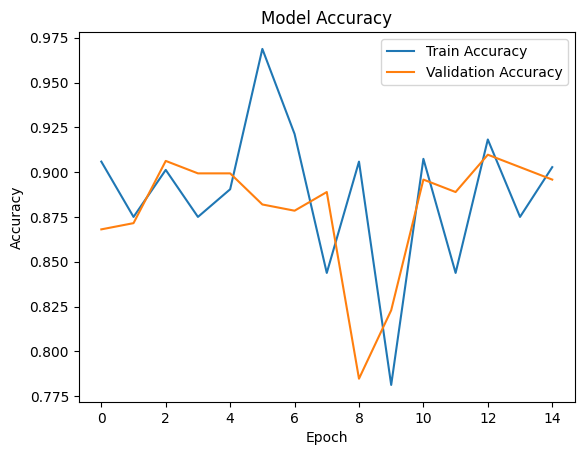

In [22]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


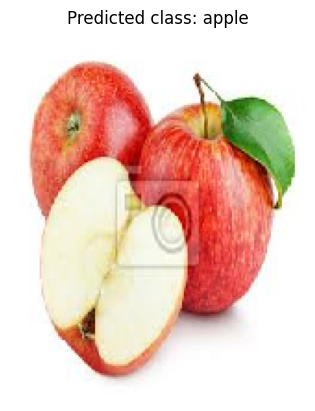

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


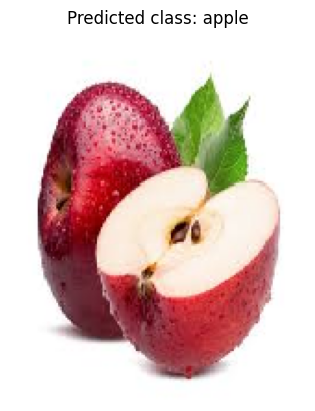

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


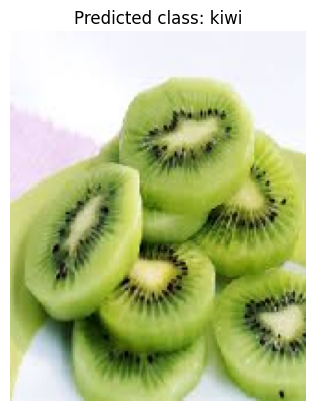

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


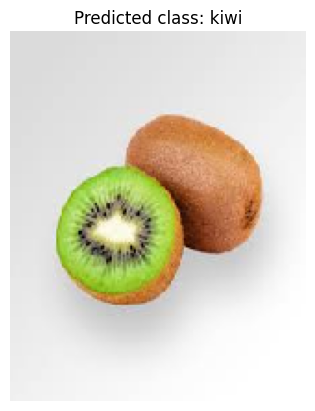

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


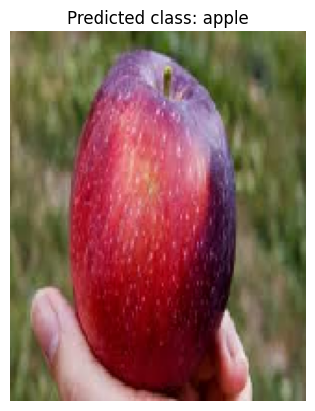

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


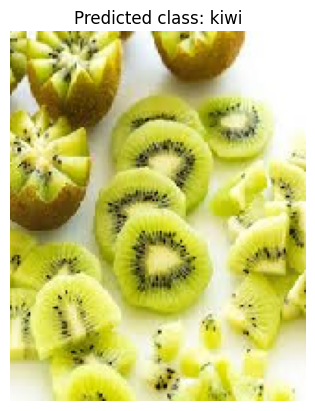

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


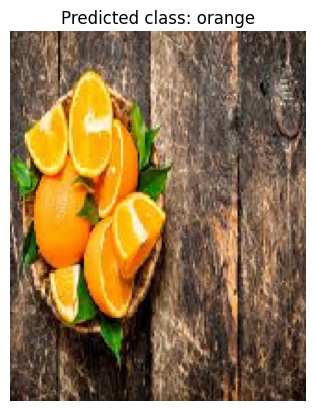

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


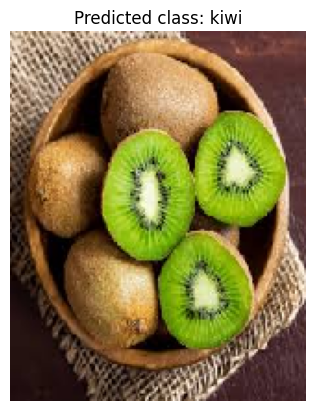

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


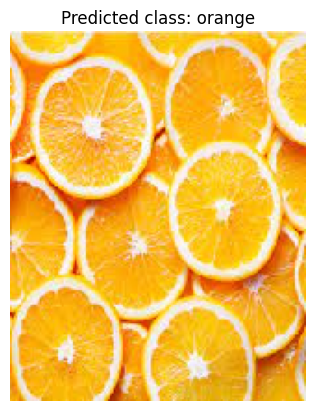

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


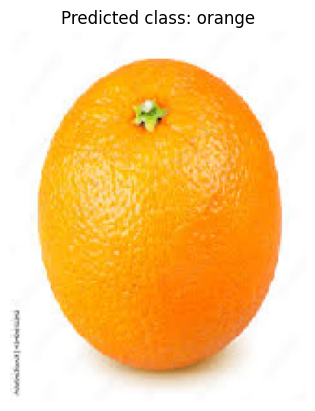

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


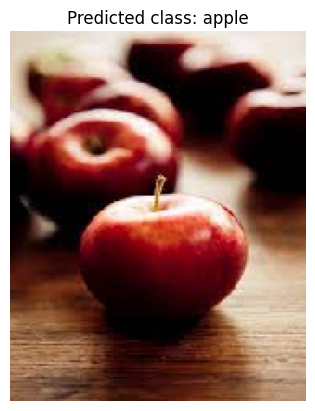

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


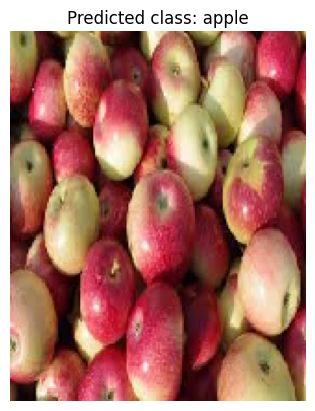

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


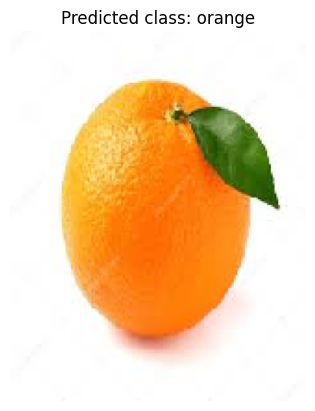

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


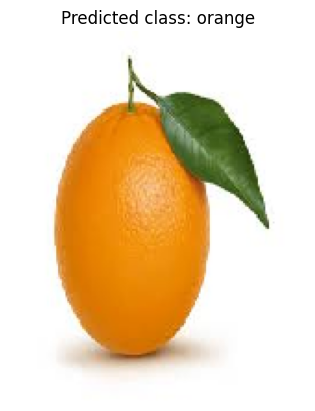

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


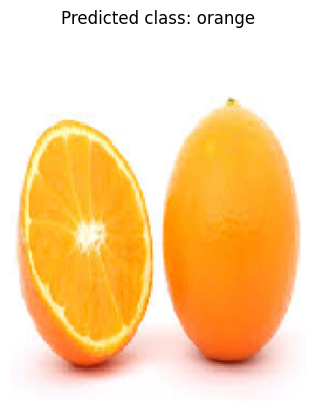

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


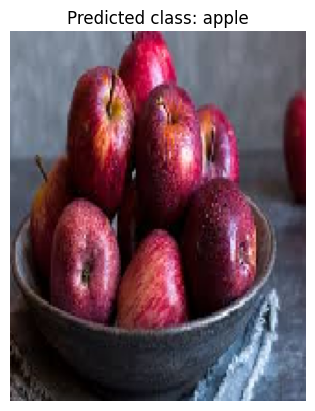

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


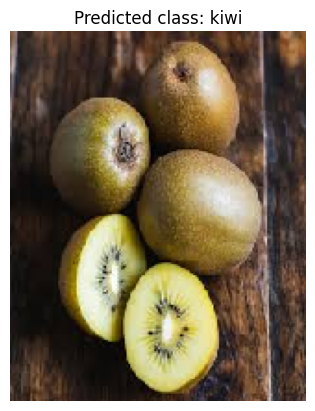

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


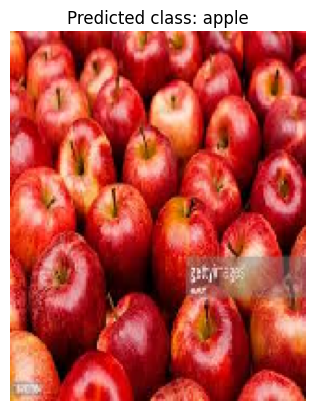

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


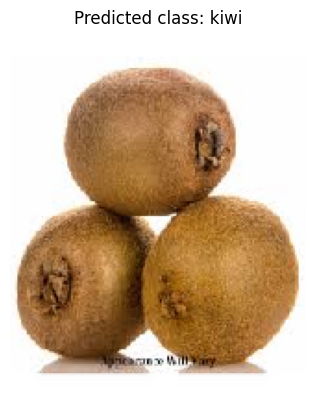

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


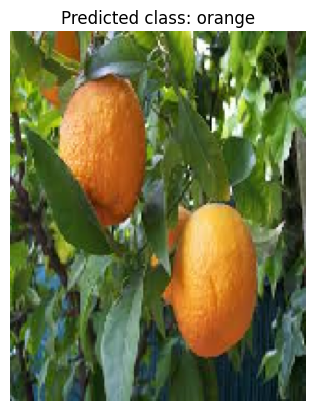

In [23]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Function to load and predict a single image
def load_and_predict_image(img_path):
    img = image.load_img(img_path, target_size=(200, 160))  # Adjust to your model's input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image

    predictions = model.predict(img_array)
    predicted_class = class_labels[np.argmax(predictions)]
    return img,predicted_class

# Predict on all images in the predict directory
for img_file in os.listdir(predict_dir):
    img_path = os.path.join(predict_dir, img_file)
    if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image file types
        img, predicted_class = load_and_predict_image(img_path)

        # Display the image and predicted class
        plt.imshow(img)
        plt.title(f'Predicted class: {predicted_class}')
        plt.axis('off')  # Hide axes
        plt.show() 